In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 获取数据

In [206]:
file_data = pd.read_csv("./data/链家北京租房数据.csv")
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


In [207]:
file_data.shape

(8223, 5)

In [208]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
区域         8223 non-null object
小区名称       8223 non-null object
户型         8223 non-null object
面积(㎡)      8223 non-null object
价格(元/月)    8223 non-null int64
dtypes: int64(1), object(4)
memory usage: 321.3+ KB


In [209]:
file_data.describe()

,价格(元/月)
count,8223.000000
mean,9512.297823
std,9186.752612
min,566.000000
25%,4800.000000
50%,6800.000000
75%,10000.000000
max,150000.000000


# 数据基本处理

## 重复值和空值处理

- duplicated
    - subset : column label or sequence of labels, optional
    - 用来指定特定的列，默认所有列
    - keep : {‘first’, ‘last’, False}, default ‘first’
    - 删除重复项并保留第一次出现的项
    - inplace : boolean, default False
    - 是直接在原来数据上修改还是保留一个副本

In [210]:
# 重复值
# file_data.duplicated()

file_data = file_data.drop_duplicates()
file_data.shape

(5773, 5)

In [211]:
# 空值处理
file_data = file_data.dropna(axis=0)
file_data.shape

(5773, 5)

## 数据转换类型

### 面积数据类型转换

In [212]:
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


In [213]:
# 单个值实现
print(file_data["面积(㎡)"].values[0][:-2])
#注意,这里数据默认是字符串,所以需要转成 float
area = file_data["面积(㎡)"].apply(lambda x: np.float64(x[:-2]))
# area = area.astype(np.float32)
area.head()

59.11


0    59.11
1    56.92
2    40.57
3    57.09
4    42.67
Name: 面积(㎡), dtype: float64

In [214]:
file_data['面积(㎡)'] = area
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500


### 户型表达方式替换

In [215]:
house_data = file_data["户型"]
house_data = house_data.apply(lambda x: x.replace("房间", "室"))
file_data["户型"] = house_data
file_data.head()
# temp_list = []

# for i in house_data:
#     print(i)
#     new_info = i.replace("房间", "室")
#     temp_list.append(new_info)
#file_data.loc[:, "户型"] = temp_list


,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500


# 图表分析

## 房源数量、位置分布分析

In [216]:
area_list = file_data["区域"].unique()
new_df = pd.DataFrame({"区域":area_list, "数量":[0]*len(area_list)})
new_df

,区域,数量
0,东城,0
1,丰台,0
2,亦庄开发区,0
3,大兴,0
4,房山,0
5,昌平,0
6,朝阳,0
7,海淀,0
8,石景山,0
9,西城,0


In [217]:
# 获取每个区域房源数量
area_count = file_data.groupby(by="区域").count()
new_df["数量"] = area_count.values
new_df.sort_values(by="数量", ascending=False)

,区域,数量
6,朝阳,1597
7,海淀,605
1,丰台,577
10,通州,477
9,西城,442
3,大兴,362
5,昌平,347
12,顺义,297
11,门头沟,285
0,东城,282


## 户型数量分析

In [218]:
house_data = file_data["户型"]
house_data.head()
    


0    1室0厅
1    3室0厅
2    1室1厅
3    2室1厅
4    1室1厅
Name: 户型, dtype: object

In [219]:
def all_house(arr):
    key = np.unique(arr)
    result = {}
    
    for k in key:
        mask = (arr == k)
        arr_new = arr[mask]
        v = arr_new.size
        result[k] = v
        
    return result    

In [221]:
house_info = all_house(house_data)
house_info

{'0室0厅': 1,
 '1室0卫': 10,
 '1室0厅': 244,
 '1室1卫': 126,
 '1室1厅': 844,
 '1室2厅': 13,
 '2室0卫': 1,
 '2室0厅': 23,
 '2室1卫': 120,
 '2室1厅': 2249,
 '2室2卫': 22,
 '2室2厅': 265,
 '2室3厅': 1,
 '3室0卫': 3,
 '3室0厅': 12,
 '3室1卫': 92,
 '3室1厅': 766,
 '3室2卫': 48,
 '3室2厅': 489,
 '3室3卫': 1,
 '3室3厅': 10,
 '4室1卫': 15,
 '4室1厅': 58,
 '4室2卫': 24,
 '4室2厅': 191,
 '4室3卫': 5,
 '4室3厅': 9,
 '4室5厅': 2,
 '5室0卫': 1,
 '5室0厅': 1,
 '5室1卫': 3,
 '5室1厅': 7,
 '5室2卫': 7,
 '5室2厅': 49,
 '5室3卫': 3,
 '5室3厅': 24,
 '5室4厅': 1,
 '5室5厅': 1,
 '6室0厅': 1,
 '6室1卫': 1,
 '6室1厅': 1,
 '6室2厅': 5,
 '6室3卫': 2,
 '6室3厅': 6,
 '6室4卫': 2,
 '7室1厅': 1,
 '7室2厅': 2,
 '7室3厅': 3,
 '7室4厅': 1,
 '8室4厅': 2,
 '9室1厅': 2,
 '9室2厅': 1,
 '9室5厅': 2}

In [222]:
# 去掉统计数量较少的值
house_data = dict((key, value) for key, value in house_info.items() if value > 50)

In [223]:
show_houses = pd.DataFrame({"户型": [x for x in house_data.keys()],
              "数量": [x for x in house_data.values()]})
show_houses

,户型,数量
0,1室0厅,244
1,1室1卫,126
2,1室1厅,844
3,2室1卫,120
4,2室1厅,2249
5,2室2厅,265
6,3室1卫,92
7,3室1厅,766
8,3室2厅,489
9,4室1厅,58


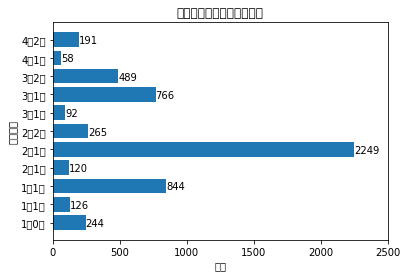

In [181]:
# 图形展示房屋类型

house_type = show_houses["户型"]
house_type_num = show_houses["数量"]

plt.barh(range(len(house_type)), house_type_num)

plt.yticks(range(11), house_type)
plt.xlim(0, 2500)

plt.title("北京市各区域租房数量统计")
plt.xlabel("数量")
plt.ylabel("房屋类型")

# 给每个条上面添加具体数字
for x, y in enumerate(house_type_num):
#     print(x, y)
    #y+0.5, x-0.2是调整数字显示的位置,后面的是固定格式
    plt.text(y+0.5, x-0.2, "%s" %y)

plt.show()

## 平均租金分析

In [182]:
df_all = pd.DataFrame({"区域": file_data["区域"].unique(),
              "房租总金额": [0]*13,
              "总面积": [0]*13})
df_all

,区域,房租总金额,总面积
0,东城,0,0
1,丰台,0,0
2,亦庄开发区,0,0
3,大兴,0,0
4,房山,0,0
5,昌平,0,0
6,朝阳,0,0
7,海淀,0,0
8,石景山,0,0
9,西城,0,0


In [183]:
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500


In [187]:
sum_price = file_data["价格(元/月)"].groupby(file_data["区域"]).sum()
sum_area = file_data["面积(㎡)"].groupby(file_data["区域"]).sum()
sum_area

区域
东城        27353.99
丰台        50922.79
亦庄开发区     15995.53
大兴        35884.15
房山        15275.41
昌平        35972.92
朝阳       166921.72
海淀        57210.39
石景山       13956.67
西城        37141.64
通州        46625.23
门头沟       20258.20
顺义        33668.97
Name: 面积(㎡), dtype: float64

In [188]:
df_all["房租总金额"] = sum_price.values
df_all["总面积"] = sum_area.values
df_all

,区域,房租总金额,总面积
0,东城,3945550,27353.99
1,丰台,4404893,50922.79
2,亦庄开发区,1318400,15995.53
3,大兴,2286950,35884.15
4,房山,726750,15275.41
5,昌平,2521515,35972.92
6,朝阳,20281396,166921.72
7,海淀,7279350,57210.39
8,石景山,1156500,13956.67
9,西城,5636975,37141.64


In [190]:
# 计算各个区域每平方米的房租
df_all["每平米租金(元)"] = round(df_all["房租总金额"] / df_all["总面积"], 2)
df_all

,区域,数量
0,东城,282
1,丰台,577
2,亦庄开发区,147
3,大兴,362
4,房山,180
5,昌平,347
6,朝阳,1597
7,海淀,605
8,石景山,175
9,西城,442


In [195]:
#默认内连接
df_merge = pd.merge(new_df, df_all)
df_merge

,区域,数量,房租总金额,总面积,每平米租金(元)
0,东城,282,3945550,27353.99,144.24
1,丰台,577,4404893,50922.79,86.50
2,亦庄开发区,147,1318400,15995.53,82.42
3,大兴,362,2286950,35884.15,63.73
4,房山,180,726750,15275.41,47.58
5,昌平,347,2521515,35972.92,70.09
6,朝阳,1597,20281396,166921.72,121.50
7,海淀,605,7279350,57210.39,127.24
8,石景山,175,1156500,13956.67,82.86
9,西城,442,5636975,37141.64,151.77


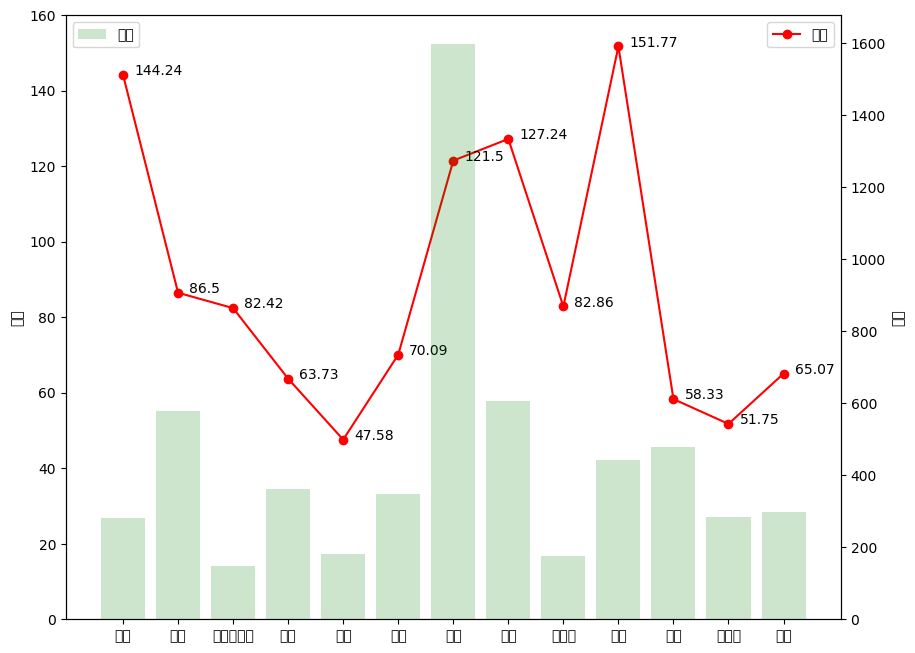

In [197]:
# 图形可视化

num = df_merge["数量"]
price = df_merge["每平米租金(元)"]
lx = df_merge["区域"]
l = [i for i in range(13)]

fig = plt.figure(figsize=(10, 8), dpi=100)

# 显示折线图
ax1 = fig.add_subplot(111)
ax1.plot(l, price, "or-", label="价格")

#给图上表上数字
for i, (_x, _y) in enumerate(zip(l, price)):
    plt.text(_x+0.2, _y, price[i])
    
ax1.set_ylim([0, 160])   
ax1.set_ylabel("价格")
plt.legend(loc="upper right")

# 显示条形图,alpha是透明度
ax2 = ax1.twinx()
plt.bar(l, num, label="数量", alpha=0.2, color="green")
ax2.set_ylabel("数量")
plt.legend(loc="upper left")
plt.xticks(l, lx)


plt.show()

## 面积基本分析

In [198]:
# 查看房屋的最大面积和最小面积
print('房屋最大面积是%d平米'%(file_data['面积(㎡)'].max()))
print('房屋最小面积是%d平米'%(file_data['面积(㎡)'].min()))

# 查看房租的最高值和最小值
print('房租最高价格为每月%d元'%(file_data['价格(元/月)'].max()))
print('房屋最低价格为每月%d元'%(file_data['价格(元/月)'].min()))

房屋最大面积是1133平米
房屋最小面积是11平米
房租最高价格为每月150000元
房屋最低价格为每月566元


In [201]:
# 按照面积划分成不同的范围
area_divide = [1, 30, 50, 70, 90, 120, 140, 160, 1200]
area_cut = pd.cut(list(file_data["面积(㎡)"]), area_divide)
area_cut

[(50, 70], (50, 70], (30, 50], (50, 70], (30, 50], ..., (90, 120], (50, 70], (90, 120], (70, 90], (30, 50]]
Length: 5773
Categories (8, interval[int64]): [(1, 30] < (30, 50] < (50, 70] < (70, 90] < (90, 120] < (120, 140] < (140, 160] < (160, 1200]]

In [202]:
#统计在不同范围下的数量和占比
area_cut_num = area_cut.describe()
area_cut_num

,counts,freqs
categories,,
"(1, 30]",41,0.007102
"(30, 50]",710,0.122986
"(50, 70]",1566,0.271263
"(70, 90]",1094,0.189503
"(90, 120]",1082,0.187424
"(120, 140]",381,0.065997
"(140, 160]",274,0.047462
"(160, 1200]",625,0.108263


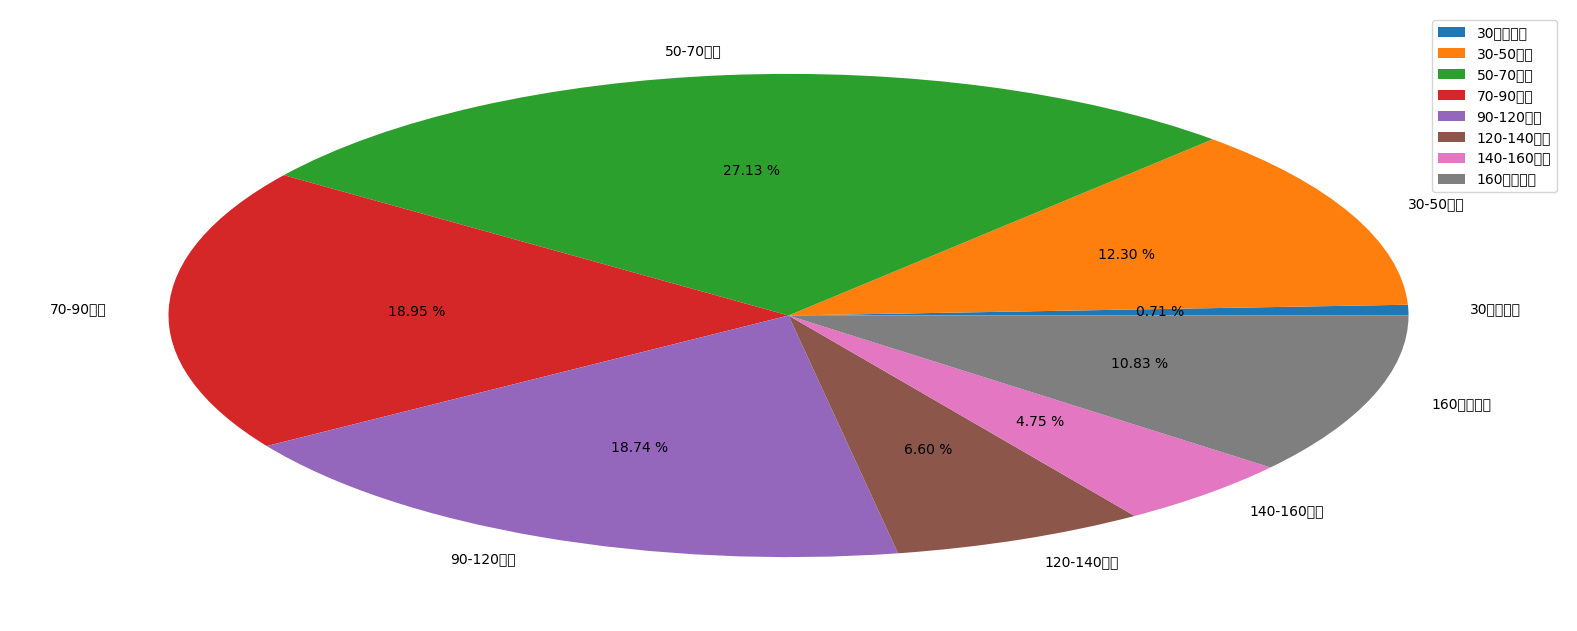

In [205]:
# 图像可视化
area_per = (area_cut_num["freqs"].values)*100

labels  = ['30平米以下', '30-50平米', '50-70平米', '70-90平米',
'90-120平米','120-140平米','140-160平米','160平米以上']

plt.figure(figsize=(20, 8), dpi=100)
# plt.axes(aspect=1)

plt.pie(x=area_per, labels=labels, autopct="%.2f %%")


plt.legend()
plt.show()